In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# # get all tables
inspector_gadget = inspect(engine)
tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [6]:
#Sequel queries format

query = "SELECT * from measurement LIMIT 10;"

df = pd.read_sql(query, engine)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [7]:
#Sequel queries format

query = "SELECT * from station LIMIT 10;"

df = pd.read_sql(query, engine)
df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [8]:
#Sql to find max date within measurement

query = """
        SELECT
            MAX(date)
        FROM
            measurement
"""

engine.execute(query).fetchall()

[('2017-08-23',)]

In [9]:
#Rainfall from date

query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
            and prcp is not null
        ORDER BY
            date asc;
"""

df = pd.read_sql(query, engine)
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
5,2016-08-23,0.70
6,2016-08-24,0.08
7,2016-08-24,2.15
8,2016-08-24,2.28
9,2016-08-24,1.22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2021 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.7+ KB


In [11]:
#create dataframe to turn date column type 

df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2021 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 KB


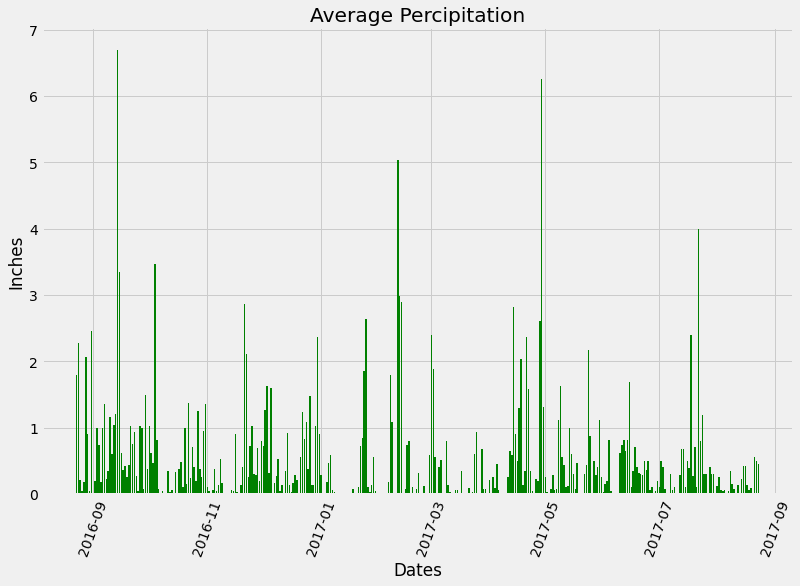

In [25]:
#Use matplotlib to create bar chart of rainfall by date
plt.figure(figsize=(12,8))
plt.bar(df["date"], df.prcp, color="green")
plt.title("Average Percipitation")
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.xticks(rotation=70)
plt.show()

In [26]:
#Next perform the same tasks for stations

query = "SELECT COUNT(*) FROM station"
engine.execute(query).fetchall()

#There are nine total stations

[(9,)]

In [27]:
#Query to find the most-active stations (with the most rows). Counts in desc order.

query = """
    SELECT
        s.station, 
        count(m.id) as num_ob
    FROM
        measurement m
        JOIN station s on m.station = s.station
    GROUP BY
        s.station
    ORDER BY
        num_ob desc;
"""
df = pd.read_sql(query, engine)
df

,station,num_ob
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [28]:
#Find the max, min and averages of the most active
query = """
        SELECT
            min(tobs) as min_tobs,
            max(tobs) as max_tobs,
            avg(tobs) as avg_tobs
        FROM
            measurement
        WHERE
            station = 'USC00519281'

"""


df = pd.read_sql(query, engine)
df

,min_tobs,max_tobs,avg_tobs
0,54.0,85.0,71.663781


In [29]:
#Apply the date to the most active station

query = """
        SELECT
            date,
            tobs
        FROM
            measurement
        WHERE
            date >= '2016-08-23'
            and tobs is not null
            and station = 'USC00519281'
        ORDER BY
            date asc;
"""

df = pd.read_sql(query, engine)
df["date"] = pd.to_datetime(df["date"])
df.head(10)


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
5,2016-08-28,73.0
6,2016-08-29,78.0
7,2016-08-30,77.0
8,2016-08-31,78.0
9,2016-09-01,80.0


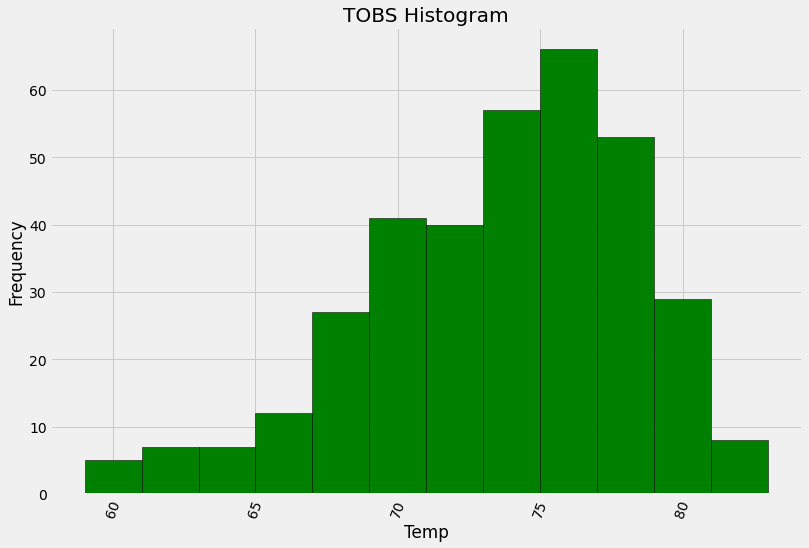

In [31]:
#Create a twelve bin histogram of the TOBS for the most active station 
plt.figure(figsize=(12,8))
plt.hist(df.tobs, bins=12, color="green", edgecolor="black")
plt.title("TOBS Histogram")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.xticks(rotation=70)
plt.show()


In [ ]:
#Waihee, HI is the most active station 